# Optimization project: K-Menas Clustering

__Given that we don't have the proper datafiles to run the code, we will use synthetic ones to still do the work, and
as soon as we have the real files we will just substitute them.__

In [8]:
import numpy as np
from numpy import random
import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
#Simulate dataframe
X1 = np.random.uniform(low=0, high=25, size=(200,))
X2 = np.random.uniform(low=5, high=30, size=(200))
df = pd.DataFrame({'i': X1, 'j': X2}, columns=['i', 'j'])

In [9]:
df

,i,j
0,0.987775,16.035282
1,15.517313,25.503891
2,18.438593,28.130090
3,20.773724,8.590110
4,21.101574,19.934185
...,...,...
195,5.010826,10.020548
196,7.386612,8.332492
197,12.985537,24.191859
198,13.116469,25.598138


## K-means Clustering:


In [21]:
# Randomly assign indeces of cluster centroids:

initial_centroids = random.sample(range(0, len(df)), 3)
initial_centroids

[73, 27, 74]

In [22]:
# Take the points from the dataframe:

centroids = []
for i in initial_centroids:
    centroids.append(df.loc[i])
centroids

[i     5.225811
 j    28.105185
 Name: 73, dtype: float64,
 i     2.721111
 j    22.376800
 Name: 27, dtype: float64,
 i     1.695437
 j    10.261895
 Name: 74, dtype: float64]

In [24]:
# To calculate the distance between two points:

def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [25]:
calc_distance(df.loc[0],df.loc[1])

17.342492081913473

In [26]:
# To find the closest centroid to each data point:

def findClosestCentroids(initial_centroids, X):
    assigned_centroid = []
    for index, row in X.iterrows():
        distance=[]
        for center in initial_centroids:
            distance.append(calc_distance(row, center))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [27]:
get_centroids = findClosestCentroids(centroids, df)
get_centroids

[2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 1]

In [28]:
def calc_centroids(clusters, X):
    
    #initiate empty list for new centroids of each cluster:
    new_centroids = []
    
    #df including each point and its respective cluster
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    
    #iterate over the distinct clusters
    for c in set(new_df['cluster']):
        
        #take out the data points corresponding to each cluster:
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        
        #find the new cluster centroid which is the mean of the clusters we already assigned
        cluster_mean = current_cluster.mean(axis=0)
        
        #append the new centroid
        new_centroids.append(cluster_mean)
        
    return new_centroids

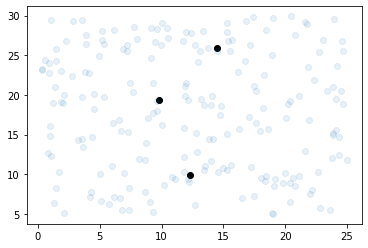

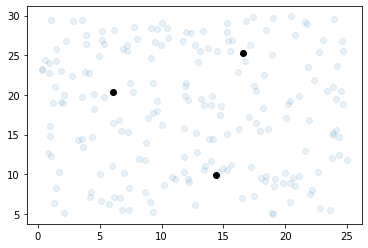

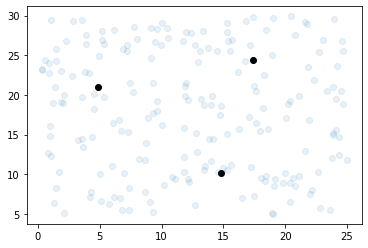

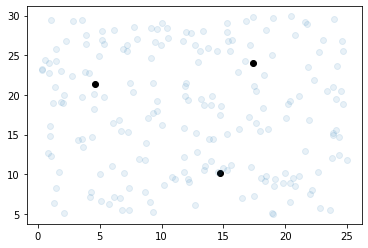

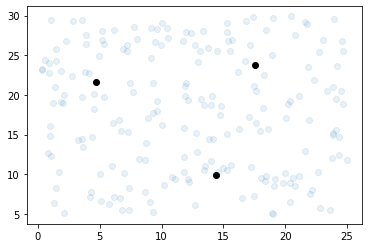

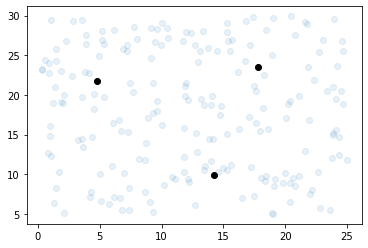

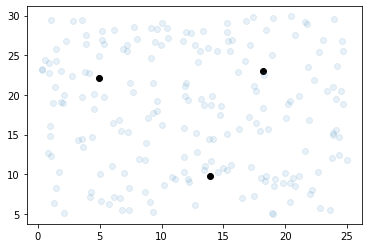

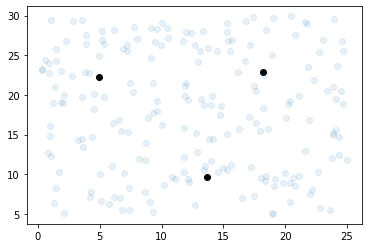

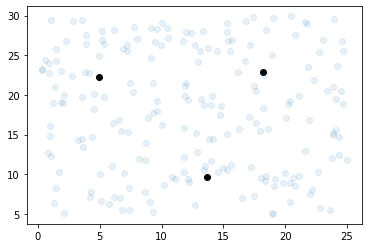

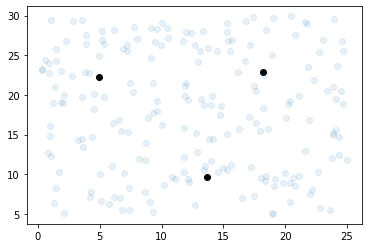

In [29]:
for i in range(10):
    
    # Recursively call the functions again to update the mean of the clusters
    get_centroids = findClosestCentroids(centroids, df)
    centroids = calc_centroids(get_centroids, df)
    #print(centroids)
    
    #plot the centroids after every iteration:
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(df.i, df.j, alpha=0.1)
    plt.show()

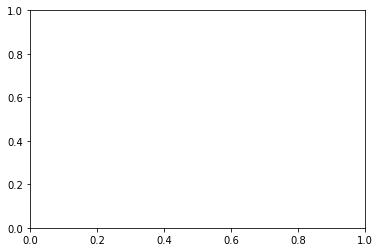

In [174]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


def animate2(i):

    ax1.clear()
    ax1.plot(df.i, df.j)


fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# create animation
animation.FuncAnimation(fig, animate2, frames=range(1, len(test_data)), interval=1000, repeat=False)

# start animation
plt.show()